In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Кодирование данных и масштабирование

In [121]:
data = pd.read_csv('/kaggle/input/anime-recommendations-database/anime.csv', sep=",")

In [122]:
data.shape

(12294, 7)

In [123]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [124]:
for column in ['anime_id', 'name']:
    data = data.drop(column, axis=1)

In [125]:
data.head()

,genre,type,episodes,rating,members
0,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,"Sci-Fi, Thriller",TV,24,9.17,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [126]:
data[['genre']]

,genre
0,"Drama, Romance, School, Supernatural"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller"
4,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
12289,Hentai
12290,Hentai
12291,Hentai
12292,Hentai


In [127]:
data.isnull().sum()

genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [128]:
for null_rows in ['genre', 'type', 'rating']:
    data.dropna(subset=[null_rows], inplace=True)

In [129]:
data.isnull().sum()

genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [130]:
data.shape

(12017, 5)

In [131]:
data.dtypes.loc[lambda x: x == 'object']

genre       object
type        object
episodes    object
dtype: object

In [132]:
genres = [genre for genres in data['genre'] for genre in genres.split(', ')]
unique_genres = np.unique(genres)
print(len(unique_genres))
unique_genres


43


array(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai',
       'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts',
       'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police',
       'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi',
       'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai',
       'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri'], dtype='<U13')

In [133]:
for genre in unique_genres:
    data[genre] = 0
for i, genres in data['genre'].items():
    for genre in genres.split(', '):
        data.at[i, genre] = 1
data.drop('genre', axis=1, inplace=True)
data.head()

,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,Movie,1,9.37,200630,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,TV,64,9.26,793665,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TV,51,9.25,114262,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TV,24,9.17,673572,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,TV,51,9.16,151266,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
data.dtypes.loc[lambda x: x == 'object']

type        object
episodes    object
dtype: object

In [135]:
np.where(data['episodes']=='Unknown')[0].shape

(187,)

In [136]:
data = data.drop(data[data['episodes'] == 'Unknown'].index)
np.where(data['episodes']=='Unknown')[0].shape

(0,)

In [137]:
data['episodes'] = data['episodes'].map(int)

In [138]:
data['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [139]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data[['type']] = oe.fit_transform(data[['type']])
data.dtypes.loc[lambda x: x == 'object']

Series([], dtype: object)

In [140]:
data.dtypes.loc[lambda x: x == 'object']

Series([], dtype: object)

In [141]:
data.columns = [str(i) for i in data.columns]
data.describe()

,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
count,11830.000000,11830.000000,11830.000000,1.183000e+04,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,...,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,3.037785,12.486729,6.484609,1.851100e+04,0.232291,0.193829,0.006002,0.378952,0.020118,0.024260,...,0.005241,0.099746,0.031784,0.044548,0.037616,0.083939,0.007270,0.008453,0.003128,0.003466
std,1.811007,47.097131,1.019147,5.537144e+04,0.422311,0.395313,0.077241,0.485147,0.140411,0.153863,...,0.072207,0.299674,0.175431,0.206317,0.190274,0.277308,0.084955,0.091555,0.055840,0.058771
min,0.000000,1.000000,1.670000,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.892500,2.322500e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,6.570000,1.589500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,12.000000,7.190000,9.832000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1818.000000,10.000000,1.013917e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [143]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['episodes', 'rating', 'members']])
sc2_data

array([[-0.24390475,  2.83130101,  3.28918118],
       [ 1.09381288,  2.7233631 , 13.99975827],
       [ 0.81777591,  2.71355056,  1.72932194],
       ...,
       [-0.18020391, -1.57452817, -0.33036483],
       [-0.24390475, -1.4764028 , -0.3311595 ],
       [-0.24390475, -1.00540102, -0.3317555 ]])

In [144]:
data[['episodes', 'rating', 'members']] = sc2_data

# Предсказание

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
(data['Hentai'] == 1).sum()

1099

In [148]:
target = data[['Hentai']]
data.drop('Hentai', axis=1, inplace=True)

In [149]:
target.shape

(11830, 1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, test_size=0.2, random_state=42)

In [153]:
from typing import Dict

def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

## Логистическая регрессия

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

In [154]:
lg = LogisticRegression()
lg.fit(X_train, y_train.ravel())

LogisticRegression()

In [155]:
pred_y_test_proba = lg.predict_proba(X_test)
pred_y_test = np.argmax(pred_y_test_proba, axis=1)

In [156]:
print_accuracy_score_for_classes(y_test.ravel(), pred_y_test)

Метка 	 Accuracy
0 	 0.989242282507016
1 	 0.868421052631579


In [157]:
log_loss(y_test.ravel(), pred_y_test)

0.8074022103225739

## SVM

In [158]:
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

In [190]:
def print_metrics_for_different_kernels(kernels, C):
    for kernel in kernels:
        svc = SVC(kernel=kernel, C=C, probability=True)
        svc.fit(X_train, y_train.ravel())
        
        pred_y_test_proba = svc.predict_proba(X_test)
        pred_y_test = np.argmax(pred_y_test_proba, axis=1)
        
        print('{}\nKernel \t {}'.format('='*10, kernel))
        
        print()
        print('Accuracy')
        print_accuracy_score_for_classes(y_test.ravel(), pred_y_test)
        print()
        
        log_loss_metric = log_loss(y_test.ravel(), pred_y_test)
        
        print('LgLoss \n{}'.format(log_loss_metric))
        print()
        print()

In [192]:
print_metrics_for_different_kernels(['poly', 'linear', 'rbf', 'sigmoid'], C=5)

Kernel 	 poly

Accuracy
Метка 	 Accuracy
0 	 0.980355472404116
1 	 0.868421052631579

LgLoss 
1.0968482857212323


Kernel 	 linear

Accuracy
Метка 	 Accuracy
0 	 0.989242282507016
1 	 0.8596491228070176

LgLoss 
0.8378702182592747


Kernel 	 rbf

Accuracy
Метка 	 Accuracy
0 	 0.9897100093545369
1 	 0.8771929824561403

LgLoss 
0.7617001984175225


Kernel 	 sigmoid

Accuracy
Метка 	 Accuracy
0 	 0.999532273152479
1 	 0.0

LgLoss 
3.488586908752252




## Деревья решений

In [161]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [162]:
clf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train.ravel())

In [163]:
pred_y_test_proba = clf.predict_proba(X_test)
pred_y_test = np.argmax(pred_y_test_proba, axis=1)

In [164]:
print_accuracy_score_for_classes(y_test.ravel(), pred_y_test)

Метка 	 Accuracy
0 	 0.9831618334892422
1 	 0.881578947368421


In [165]:
log_loss(y_test.ravel(), pred_y_test)

0.9597422500060782

### Важность признаков

In [177]:
sorted(list(zip(data.columns.values, clf.feature_importances_)), key=lambda x: x[1], reverse=True)

[('type', 0.2527704183313309),
 ('members', 0.15676888468880124),
 ('Action', 0.13043151984523027),
 ('Comedy', 0.08459507760958529),
 ('Drama', 0.06801037362106936),
 ('rating', 0.06382169379125198),
 ('Sci-Fi', 0.041008477242900916),
 ('Romance', 0.021820434812653947),
 ('episodes', 0.01976404648524759),
 ('Adventure', 0.01840616224590042),
 ('Slice of Life', 0.015427954579995988),
 ('Fantasy', 0.014505256822723554),
 ('Shounen', 0.013716738455562242),
 ('Mystery', 0.011128060612203339),
 ('Ecchi', 0.011105584899657269),
 ('Demons', 0.00826056952277657),
 ('Shoujo', 0.00753455024404381),
 ('Music', 0.006301070869701497),
 ('Horror', 0.006251332476374522),
 ('Supernatural', 0.005863209981800086),
 ('Yuri', 0.005652866878554096),
 ('Military', 0.004976427975172386),
 ('Mecha', 0.004937906598608942),
 ('Magic', 0.004878675236535766),
 ('Kids', 0.004697779665013315),
 ('Psychological', 0.0040314260890299165),
 ('Historical', 0.003432532525161955),
 ('Harem', 0.002115436330680849),
 ('Sup

In [173]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, top_feature_num=5, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))[:top_feature_num]
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)[:top_feature_num]
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

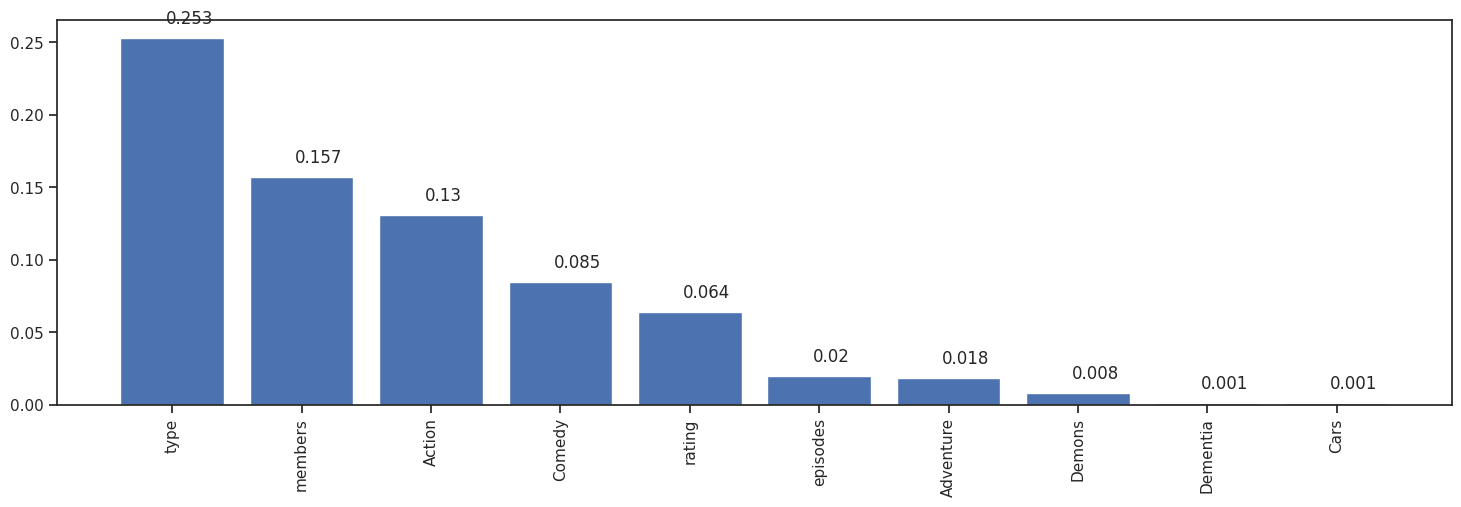

In [175]:
labels, importance = draw_feature_importances(clf, data, top_feature_num=10 )

### Визуализация

In [183]:
import graphviz 
from sklearn import tree

In [179]:
clf.classes_

array([0, 1])

In [ ]:
class_names = ['No Hentai', 'Hentai']

In [184]:
tree.export_graphviz(clf, out_file='desision_tree.dot', 
                           feature_names=data.columns.values.tolist(), 
                           class_names=class_names, 
                           filled=True, rounded=True, special_characters=True)

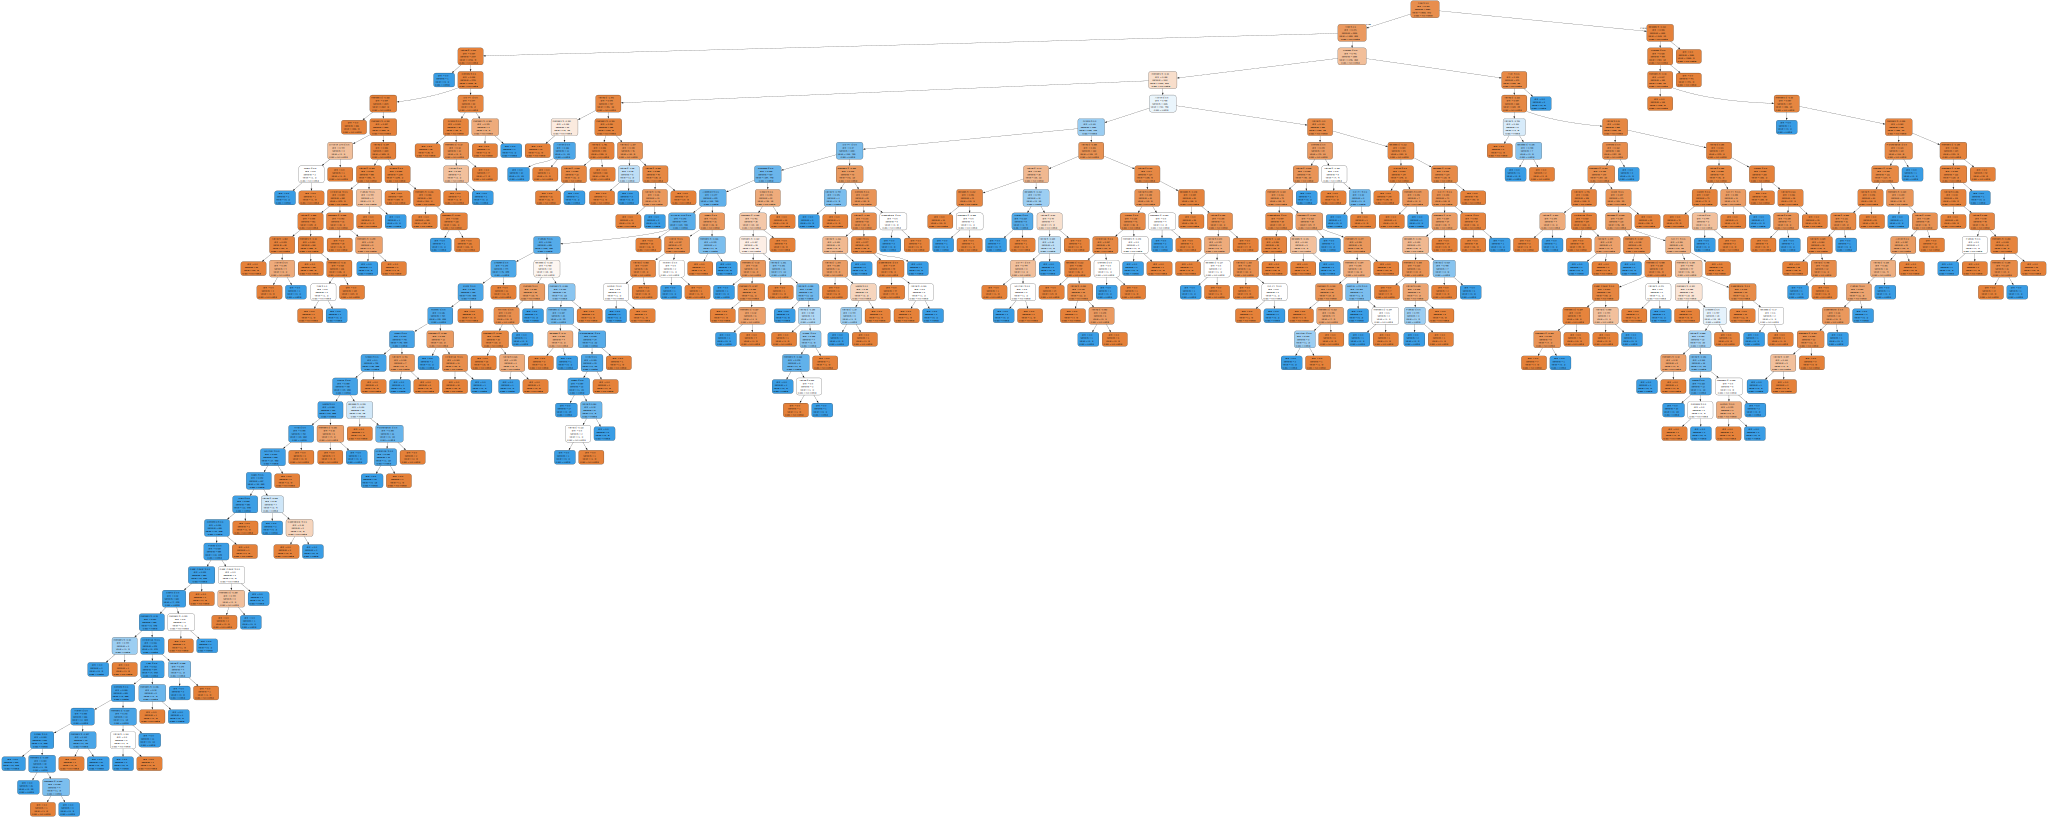

In [186]:
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=data.columns.values.tolist(), 
                           class_names=class_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph